In [ ]:
from IPython.display import clear_output
!pip install imutils
clear_output()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"niranjan186","key":"eb67d469cb2420b43fc4ee18583b7d5e"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

100% 148M/149M [00:09<00:00, 16.4MB/s]
100% 149M/149M [00:09<00:00, 16.9MB/s]


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import scipy
!pip install colorama
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.callbacks import ReduceLROnPlateau

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import datetime

import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import *
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard, LambdaCallback
from keras.losses import *
import seaborn as sns
import numpy as np
import itertools
import datetime

import cv2
import os
import io
init_notebook_mode(connected=True)
RANDOM_SEED = 42

In [ ]:
!mkdir brain-tumor-mri-dataset

In [ ]:
base_dir = "/content/brain-tumor-mri-dataset"

In [ ]:
test_dir = f'{base_dir}/Testing'
train_dir = f"{base_dir}/Training"

train_glioma_tumor_dir = f'{train_dir}/glioma_tumor'
train_meningioma_tumor_dir = f'{train_dir}/meningioma_tumor'
train_no_tumor_dir = f'{train_dir}/no_tumor'
train_pituitary_tumor_dir = f'{train_dir}/pituitary_tumor'


test_glioma_tumor_dir = f'{test_dir}/glioma_tumor'
test_meningioma_tumor_dir = f'{test_dir}/meningioma_tumor'
test_no_tumor_dir = f'{test_dir}/no_tumor'
test_pituitary_tumor_dir = f'{test_dir}/pituitary_tumor'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

X_train = [] # training images.
y_train  = [] # training labels.
X_test = [] # testing images.
y_test = [] # testing labels.

image_size = 224


image_size = 224
for i in labels:
    folderPath = f"{train_dir}/{i}"
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

    folderPath = f"{test_dir}/{i}"
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)

100%|██████████| 300/300 [00:00<00:00, 328.26it/s]


In [ ]:
IMG_SIZE=(224,224)

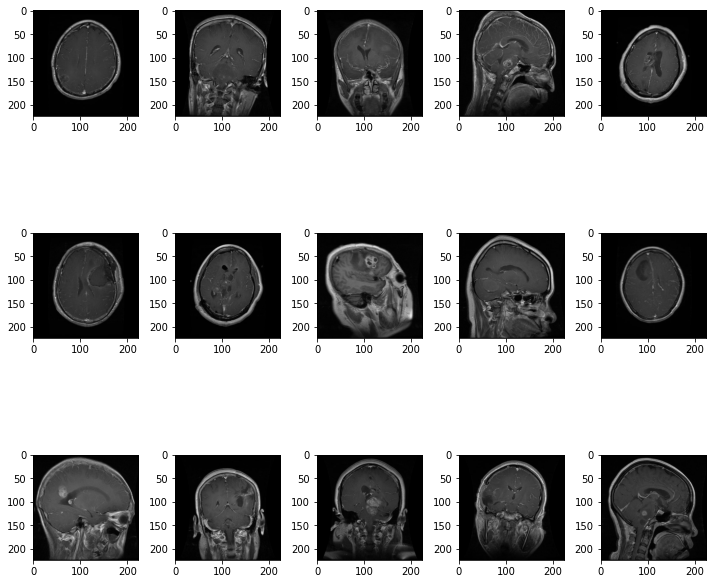

In [ ]:
images = [X_train[i] for i in range(15)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=42)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

print(X_test.shape)
print(X_train.shape)
print(y_train.shape)

(703, 224, 224, 3)
(6320, 224, 224, 3)
(6320, 4)


In [ ]:
y_test

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
def preprocess_imgs(set_name, img_size):
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [ ]:
X_train_prep = preprocess_imgs(set_name=X_train, img_size=IMG_SIZE)

In [ ]:
X_test_prep = preprocess_imgs(set_name=X_test, img_size=IMG_SIZE)

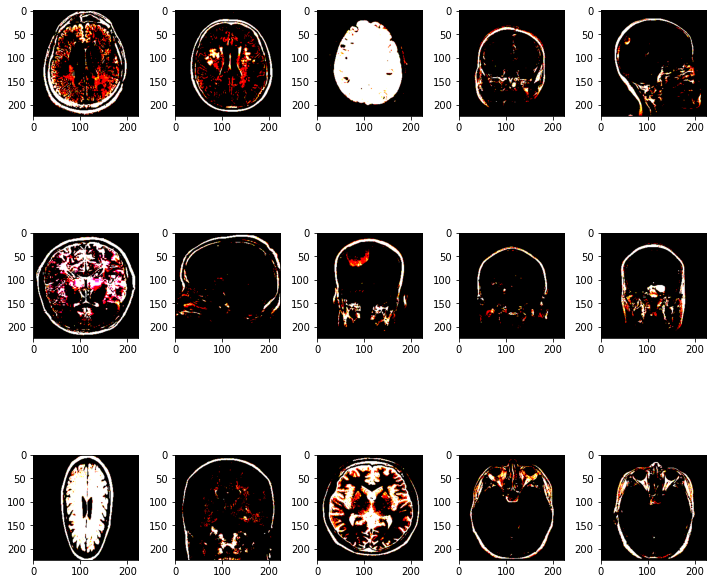

In [ ]:
images_prep = [X_train_prep[i] for i in range(15)]
fig1, axes1 = plt.subplots(3, 5, figsize = (10, 10))
axes1 = axes1.flatten()
for img, ax in zip(images_prep, axes1):
    ax.imshow(img)
plt.tight_layout()
plt.show()

In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.99):
            self.model.stop_training = True

In [ ]:
callback = myCallbacks()

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True,
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,

)

datagen_val = ImageDataGenerator(rescale=1./255)


In [ ]:
%load_ext tensorboard

class_names = list(labels)
def plot_to_image(figure):
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)

    digit = tf.image.decode_png(buf.getvalue(), channels=4)
    digit = tf.expand_dims(digit, 0)

    return digit

In [ ]:
def plot_confusion_matrix(cm, class_names):
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return figure

***VGG19***

In [ ]:
pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")
pre_trained_model.trainable = True

for layer in pre_trained_model.layers[:19]:
    layer.trainable=False

x=pre_trained_model.output
from keras.layers import Dense,GlobalAveragePooling2D

x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.1)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
x = Dropout(0.1)(x)
x = Flatten()(x)
preds=Dense(4, activation='softmax')(x)
model1 =Model(inputs=pre_trained_model.input,outputs=preds)

model1.compile(optimizer = Adam(learning_rate= 0.001) , loss = 'categorical_crossentropy' , metrics = ['accuracy','AUC'])
model1.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
import datetime
from sklearn.metrics import confusion_matrix,classification_report
def log_confusion_matrix(epoch, logs):
    predictions = np.argmax(model1.predict(X_test), axis=1)
    cm = confusion_matrix(np.argmax(y_test,axis=1), predictions)
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)

In [ ]:
hist1 = model1.fit(
    datagen.flow(X_train_prep,y_train, batch_size=32),
    epochs=20,
    validation_data=datagen_val.flow(X_test_prep,y_test),
    steps_per_epoch = len(X_train_prep) / 32 ,
    callbacks=[callback]
)

Epoch 1/20
197/197 [==============================] - 81s 352ms/step - loss: 0.7646 - accuracy: 0.6828 - auc: 0.9002 - val_loss: 0.7302 - val_accuracy: 0.7354 - val_auc: 0.9301
Epoch 2/20
197/197 [==============================] - 67s 337ms/step - loss: 0.4018 - accuracy: 0.8524 - auc: 0.9710 - val_loss: 0.2711 - val_accuracy: 0.8947 - val_auc: 0.9867
Epoch 3/20
197/197 [==============================] - 66s 332ms/step - loss: 0.2882 - accuracy: 0.8976 - auc: 0.9842 - val_loss: 0.2342 - val_accuracy: 0.9104 - val_auc: 0.9897
Epoch 4/20
197/197 [==============================] - 66s 334ms/step - loss: 0.2560 - accuracy: 0.9059 - auc: 0.9875 - val_loss: 0.2565 - val_accuracy: 0.9004 - val_auc: 0.9896
Epoch 5/20
197/197 [==============================] - 66s 332ms/step - loss: 0.2198 - accuracy: 0.9233 - auc: 0.9903 - val_loss: 0.1994 - val_accuracy: 0.9275 - val_auc: 0.9922
Epoch 6/20
197/197 [==============================] - 66s 333ms/step - loss: 0.1894 - accuracy: 0.9296 - auc: 0.993

In [ ]:
model_feat = Model(inputs=model1.input,outputs=model1.get_layer('dense_23').output)

feat_train = model_feat.predict(X_train)
print(feat_train.shape)

feat_test = model_feat.predict(X_test)
print(feat_test.shape)


176/176 [==============================] - 29s 166ms/step
(5618, 512)
44/44 [==============================] - 7s 167ms/step
(1405, 512)


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(feat_train,np.argmax(y_train,axis=1))

SVC()

In [ ]:
svm.score(feat_train,np.argmax(y_train,axis=1))

0.7773228907084372

In [ ]:
svm.score(feat_test,np.argmax(y_test,axis=1))

0.7679715302491104

In [ ]:
Pred_labels = svm.predict(feat_test)

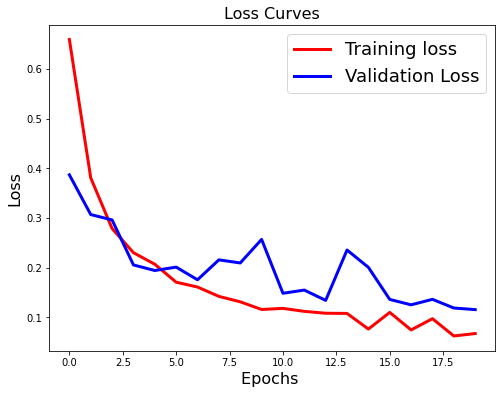

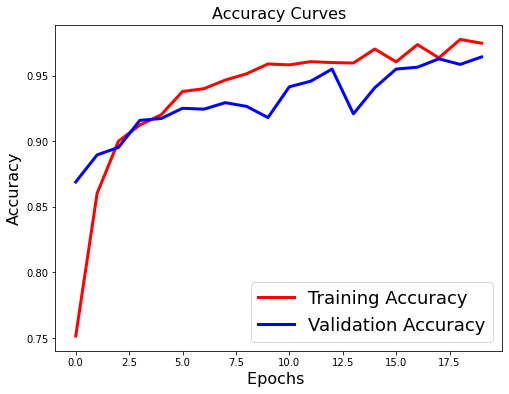

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(hist1.history['loss'],'r',linewidth=3.0)
plt.plot(hist1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(hist1.history['accuracy'],'r',linewidth=3.0)
plt.plot(hist1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()


***RESNET50***

In [ ]:
net = ResNet50(
    weights='imagenet', # Load weights pre-trained on ImageNet.
     include_top=False, # Do not include the ImageNet classifier at the top.
     input_shape=(image_size,image_size,3))


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.4)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs= net.input, outputs= model)

#compile our model.
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
BATCH_SIZE = 64
EPOCHS = 50

Checkpoint = ModelCheckpoint(filepath = 'model-{epoch:02d}-{val_accuracy:.2f}-{val_loss:.2f}.h5',monitor = 'val_loss', verbose = 1, save_best_only = True,mode = 'min')

ES = EarlyStopping(monitor = 'val_loss',min_delta = 0.001,patience = 5,mode = 'min',restore_best_weights = True,verbose = 1)

RL = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.3,patience = 3,verbose = 1,mode = 'min')

callbacks1 = [ES,RL,Checkpoint]

#history = model.fit(datagen.flow(X_train, y_train, batch_size=20),validation_data = (X_test,y_test),epochs = EPOCHS,callbacks = callbacks1)

RESNET ***101***

In [ ]:
from keras.applications import ResNet101V2
reslayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in reslayer.layers:
    layer.trainable=False

171317808/171317808 [==============================] - 1s 0us/step


In [ ]:
res=Sequential()
res.add(reslayer)
res.add(Dropout(0.5))
res.add(Flatten())
res.add(BatchNormalization())
res.add(Dense(1024,kernel_initializer='he_uniform'))
res.add(BatchNormalization())
res.add(Activation('relu'))
res.add(Dropout(0.5))
res.add(Dense(512,kernel_initializer='he_uniform'))
res.add(BatchNormalization())
res.add(Activation('relu'))
res.add(Dropout(0.5))

In [ ]:
res.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'AUC'])
res.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 1024)              102761472 
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

In [ ]:
hisres = res.fit(
    datagen.flow(X_train_prep,y_train, batch_size=32),
    epochs=20,
    validation_data=datagen_val.flow(X_test_prep,y_test),
    steps_per_epoch = len(X_train_prep) / 32 ,
    callbacks=[callback]
)

InceptionResNet

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

In [ ]:
irbase = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224,224,3))

219055592/219055592 [==============================] - 8s 0us/step


In [ ]:
for layer in irbase.layers[:-164]:
    layer.trainable=False

transfer_model=irbase.output
transfer_model=MaxPooling2D(pool_size=(4, 4))(transfer_model)
transfer_model=Flatten()(transfer_model)
transfer_model=Dense(128, activation='relu')(transfer_model)
transfer_model=Dropout(0.2)(transfer_model)
transfer_model=Dense(64, activation='relu')(transfer_model)
transfer_model=Dropout(0.2)(transfer_model)
transfer_model=Dense(4, activation='softmax')(transfer_model)

irV2 = Model(inputs=irbase.input, outputs=transfer_model)
irV2.summary()
irV2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss = 'categorical_crossentropy', metrics=['accuracy', 'AUC'])

AttributeError: ignored

In [ ]:
irhis = irV2.fit(
    datagen.flow(X_train_prep,y_train, batch_size=32),
    epochs=20,
    validation_data=datagen_val.flow(X_test_prep,y_test,shuffle=False),
    steps_per_epoch = len(X_train_prep) / 32 ,
    callbacks=[callback]
)

Epoch 1/20
197/197 [==============================] - 88s 351ms/step - loss: 0.5876 - accuracy: 0.8125 - auc: 0.9484 - val_loss: 9.1508 - val_accuracy: 0.6799 - val_auc: 0.8103
Epoch 2/20
197/197 [==============================] - 64s 325ms/step - loss: 0.2878 - accuracy: 0.9114 - auc: 0.9851 - val_loss: 0.3397 - val_accuracy: 0.9403 - val_auc: 0.9844
Epoch 3/20
197/197 [==============================] - 65s 328ms/step - loss: 0.2238 - accuracy: 0.9313 - auc: 0.9898 - val_loss: 0.7396 - val_accuracy: 0.8606 - val_auc: 0.9563
Epoch 4/20
197/197 [==============================] - 63s 319ms/step - loss: 0.1831 - accuracy: 0.9457 - auc: 0.9925 - val_loss: 0.1488 - val_accuracy: 0.9474 - val_auc: 0.9945
Epoch 5/20
197/197 [==============================] - 64s 323ms/step - loss: 0.1346 - accuracy: 0.9592 - auc: 0.9957 - val_loss: 0.3425 - val_accuracy: 0.9175 - val_auc: 0.9854
Epoch 6/20
197/197 [==============================] - 63s 319ms/step - loss: 0.1429 - accuracy: 0.9560 - auc: 0.995

In [ ]:
def predict(prediction):
    if np.argmax(prediction) == 0:
        print('Glioma')
    elif np.argmax(prediction) == 1:
        print('Meningioma')
    elif np.argmax(prediction) == 2:
        print('No tumor')
    else:
        print('Pituatary')

In [ ]:
prediction = irV2.predict(X_test)
prediction

22/22 [==============================] - 3s 153ms/step


array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 4.6984758e-36],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [ ]:
model_feat = Model(inputs=irV2.input,outputs=irV2.get_layer('dense_2').output)

feat_train = model_feat.predict(X_train_prep)
print(feat_train.shape)

feat_test = model_feat.predict(X_test_prep)
print(feat_test.shape)


198/198 [==============================] - 37s 171ms/step
(6320, 64)
22/22 [==============================] - 4s 167ms/step
(703, 64)


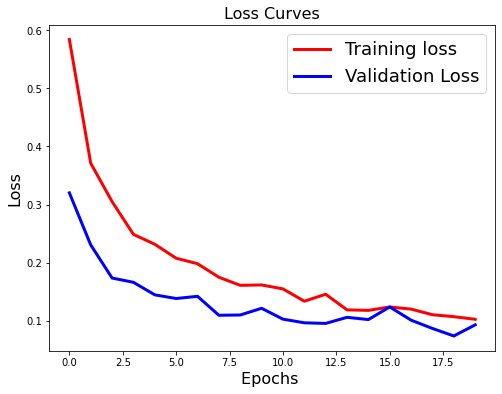

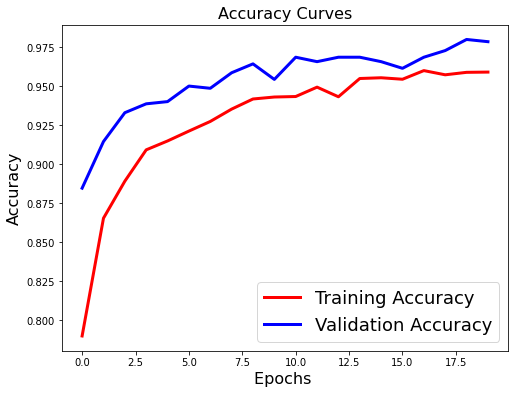

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(irhis.history['loss'],'r',linewidth=3.0)
plt.plot(irhis.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(irhis.history['accuracy'],'r',linewidth=3.0)
plt.plot(irhis.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()


SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(feat_train,np.argmax(y_train,axis=1))

SVC()

In [ ]:
svm.score(feat_train,np.argmax(y_train,axis=1))

0.28512658227848103

In [ ]:
svm.score(feat_test,np.argmax(y_test,axis=1))

0.28165007112375534

XG boost

In [ ]:
import xgboost as xgb
xb = xgb.XGBClassifier()
xb.fit(feat_train,np.argmax(y_train,axis=1))

XGBClassifier(objective='multi:softprob')

In [ ]:
xb.score(feat_train,np.argmax(y_train,axis=1))

0.28512658227848103

In [ ]:
xb.score(feat_test,np.argmax(y_test,axis=1))

0.28165007112375534

Gradient Boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(feat_train,np.argmax(y_train,axis=1))

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
clf.score(feat_train,np.argmax(y_train,axis=1))

0.28512658227848103

In [ ]:
clf.score(feat_test,np.argmax(y_test,axis=1))

0.28165007112375534

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(feat_train,np.argmax(y_train,axis=1) )


KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.score(feat_train,np.argmax(y_train,axis=1))

0.8691455696202531

In [ ]:
neigh.score(feat_test,np.argmax(y_test,axis=1))

0.7610241820768137

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(max_depth=3, random_state=42)
rc.fit(feat_train,np.argmax(y_train,axis=1) )

RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
rc.score(feat_train,np.argmax(y_train,axis=1))

0.705379746835443

In [ ]:
rc.score(feat_test,np.argmax(y_test,axis=1))

0.6600284495021337

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(feat_train,np.argmax(y_train,axis=1))



In [ ]:
gnb.score(feat_train,np.argmax(y_train,axis=1))

In [ ]:
gnb.score(feat_train,np.argmax(y_test,axis=1))

In [ ]:
gnb_pf = GaussianNB()
gnb_pf.partial_fit(feat_train,np.argmax(y_train,axis=1))

In [ ]:
gnb_pf.score(feat_train,np.argmax(y_train,axis=1))

In [ ]:
gnb_pf.score(feat_test,np.argmax(y_test,axis=1))

EFFICIENTNETB3

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import models, layers

In [ ]:
def create_model():
    conv_base = EfficientNetB3(include_top = False, weights = "imagenet", drop_connect_rate=0.6,
                               input_shape = (224, 224, 3))
    model = conv_base.output
    model = layers.GlobalAveragePooling2D()(model)
    model = layers.Dense(4, activation = "softmax")(model)
    model = models.Model(conv_base.input, model)

    model.compile(optimizer = Adam(lr = 0.001),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    return model
model3 = create_model()
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
model3.fit(
    datagen.flow(X_train_prep,y_train, batch_size=32),
    epochs=20,
    validation_data=datagen_val.flow(X_test_prep,y_test),
    steps_per_epoch = len(X_train) / 32 ,
    callbacks=[callback]
)

Epoch 1/20
  6/197 [..............................] - ETA: 1:48 - loss: 1.0001 - accuracy: 0.5729

197/197 [==============================] - 140s 614ms/step - loss: 0.4317 - accuracy: 0.8476 - val_loss: 1.8080 - val_accuracy: 0.2817
Epoch 2/20
197/197 [==============================] - 117s 589ms/step - loss: 0.1966 - accuracy: 0.9353 - val_loss: 1.5535 - val_accuracy: 0.2817
Epoch 3/20
197/197 [==============================] - 117s 589ms/step - loss: 0.1241 - accuracy: 0.9601 - val_loss: 1.7508 - val_accuracy: 0.5974
Epoch 4/20
197/197 [==============================] - 117s 589ms/step - loss: 0.1114 - accuracy: 0.9608 - val_loss: 8.1210 - val_accuracy: 0.2817
Epoch 5/20
197/197 [==============================] - 117s 591ms/step - loss: 0.1193 - accuracy: 0.9614 - val_loss: 198.5540 - val_accuracy: 0.2902
Epoch 6/20
  7/197 [>.............................] - ETA: 1:50 - loss: 0.1110 - accuracy: 0.9643

KeyboardInterrupt: ignored

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(model3.history['loss'],'r',linewidth=3.0)
plt.plot(model3.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()